Universidade Federal do Rio Grande do Sul (UFRGS)

Programa de Pós-Graduação em Engenharia Civil (PPGEC)

PEC00025: Introdução à Teoria de Vibrações

## Primeiro trabalho:
# Resposta de um sistema com 1 gdl a uma excitação na base: espectro de pseudo aceleração

__Discente:__ 00230138 - Edinei Cesario Zanoni
__Docente:__ Marcelo Maia Rocha

### 1. Introdução

A ação dinâmica resultante dos movimentos induzidos pelo movimento das pessoas em determinadas estruturas poderá gerar insegurança caso se verifiquem níveis de vibração elevados. Isso ocorre devido à possibilidade de ocorrência de fenómenos de ressonância associados com a proximidade da frequência de excitação causada na estrutura com as frequências naturais da própria estrutura. PAssim, torna-se imprescindível a determinação correta da análise da vibração de uma estrutura com 1 grau de liberdade quando submetida a ação dinâmica correspondente ao tráfego de pessoas.

### 2. Objetivos

Este trabalho tem como finalidade medir a excitação de uma estrutura submetida a uma ação dinâmica. Deste modo, este estudo tem como finalidade apresentar os valores de deslocamento da estrutura ao longo do tempo, determinando o periodograma e o espectro de resposta de pseudo-aceleração. Este estudo foi realizado em uma escadaria metálica, solicitada frequentemente por se situar em um centro de compras com grande circulação de pessoas.

### 3. Materiais e métodos

Neste estudo foi utilizado o aplicativo _iNVH_ da _Bosch_, disponível para download em Android. Este aplicativo monitora as vibrações da estrutura nem todos os eixos coordenados, após isso grava os dados analisados em um arquivo no formato _.csv_. Para a análise das informações foi utilizada uma solução númerica que se baseou no método da Integral de Duhamel, além de uma categoria já existente para análise denominada _MRPy_-_Multivariate Random Process_, que consiste em uma rotina computacional em _Python_, desenvolvida pelo Prof. Marcelo Maia Rocha para análise dinâmica de sistemas estruturais. No momento do posicionamento do equipamento, a estrutura encontrava-se encontrava-se em repouso, ou seja, sem tráfego de pessoas solicitando a mesma. Em seguida, com o início do trânsito de pessoas, iniciou-se a leitura da oscilação da escada. A leitura iniciou e parou com o smartphone em contato com a estrutura.

### 4. Definição dos parâmetros iniciais

Nesta etapa, estimou-se a massa através da geometria da escadaria e do conhecimento da densidade do material, multiplicando a densidade pelo volume. O valor do coeficiente de amortecimento foi considerado como um caso típico, valendo 1%, geralmente empregado em casos de estruturas de engenharia civil. As condições iniciais impostas pelo trabalho estipulam deslocamentos e velocidades iniciais nulas para a escadaria analisada. 

In [9]:
# Para importar os módulos Python necessários para a exibição completa deste notebook esta célula deve ser executada.
# Comando: "shift + enter".

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy

In [10]:
m = 15;                    # Massa do sistema em kg
fn = 1;                    # Frequência natural
zt = 0.01;                 # Coeficiente de amortecimento
u0 = 0;                    # Deslocamento inicial
v0 = 0;                    # Velocidade inicial             

### 5. Dados de gravação


Com os parâmetros iniciais bem determinados, o arquivo de gravação realizado na estrutura foi lido com o código _MRPy_, mencionado anteriormente, com algoritmo desenvolvido pelo professor. O tempo de gravação do movimento vibratório foi de _t0 = 0_ a _tf = 20 segundos_. Por conseguinte, plota-se o gráfico de aceleração em relação ao tempo para cada um dos eixos x, y e z (Gráficos 1, 2 e 3), onde percebe-se que a maior variação é causada no terceiro gráfico. Este resultado era esperado, uma vez que a escadaria tem movimentação maior na direção do eixo z.

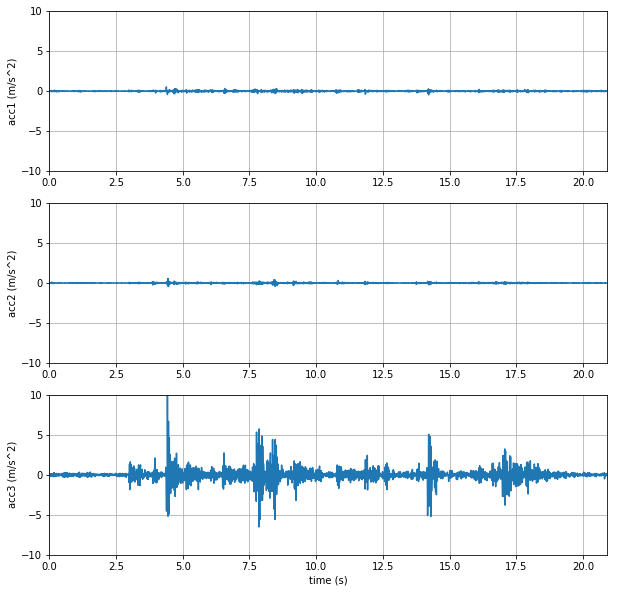

In [22]:
data = MRPy.from_file('230138', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(6, figsize=(10, 10), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-10, 10);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');

Os dados necessários para relacionar o movimento vibratório da escada estão plotados no gráfico corresponde ao eixo _z_, pois a vibração da estrutura devido a oscilação na base provocada pelo caminhar das pessoas (Gráfico 4) causa movimentos oscilatórios na estrutura neste sentido. A figura abaixo ilustra este caso.

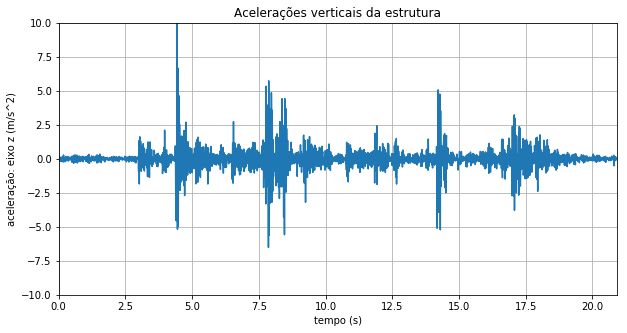

In [23]:
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(7, figsize=(10, 5), clear=True)
plt.title("Acelerações verticais da estrutura")
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('tempo (s)') 
plt.ylim(-10, 10);   plt.ylabel('aceleração: eixo z (m/s^2)') 

plt.grid(True) 

### 6. Cálculo dos deslocamentos pelo método da Integral de Duhamel

Os deslocamentos são relacionados com as respectivas aceleraçoes com duas integrais. Utilizando-se do método da Integral de Duhamell, é possível encontrar os deslocamentos da estrutura ao longo do tempo em respota ao impacto dinâmico (Gráfico 5). Nota-se que as oscilações aumentam até o tempo _t = 11s_, aproximadamente, e diminuem com o passar do tempo. 

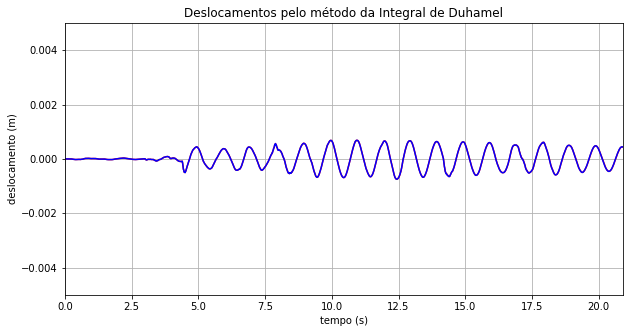

In [24]:
fn=1
u_FD = az.sdof_fdiff  (fn, zt, u0, v0)/m
u_DH = az.sdof_Duhamel(fn, zt, u0, v0)/m
plt.figure(8, figsize=(10, 5), clear=True)
plt.title("Deslocamentos pelo método da Integral de Duhamel")
plt.plot(t, u_FD[0], 'r', t, u_DH[0], 'b')

plt.xlim(0, az.Td);        plt.xlabel('tempo (s)') 
plt.ylim(-0.005, 0.005);   plt.ylabel('deslocamento (m)') 

plt.grid(True) 

### 7. Espectro de pseudoaceleração

Nesta etapa, foi possível desenvolver um algoritmo que permitisse verificar, de maneira simples, os maiores deslocamentos entre todas as frequências analisadas e salvar o maior destes valores. Assim, verificou-se que a estrutura tem excitações maiores para valores de frequência mais baixas. Além disso, como a rigidez da estrututra não varia, foi possível determinar a força estática equivalente para este caso, considerado o pior cenário.

A partir dos gráficos obtidos anteriormente, pode-se extrair o gráfico do espectro de pseudoacelaração, que é definido como uma resposta gráfica que relaciona o valor da força de restituição elástica com o período natural e/ou da frequência natural para um sistema de um grau de liberdade, considerando uma determinada excitação. 

O gráfico é obtido a partir da variação do comportamento da estrutura para diferentes valores de frequência natural (fn). Deste modo, torna-se possível extrair dados importantes como o maior deslocamento vertical do patamar da escada (utilizado para determinar a maior força solicitada pela estrutura), o valor de frequência natural da estrutura e o valor correspondente a rigidez da estrutura (Gráficos 6 e 7).

Maior deslocamento: 0.004895404433537134
Frequência natural correspondente ao pior cenário de deslocamento: 0.1
Rígidez da estrutura = 5.921762640653615
Força estática equivalente = 0.004895404433537134


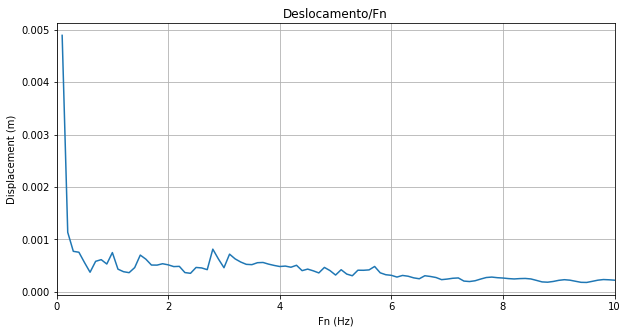

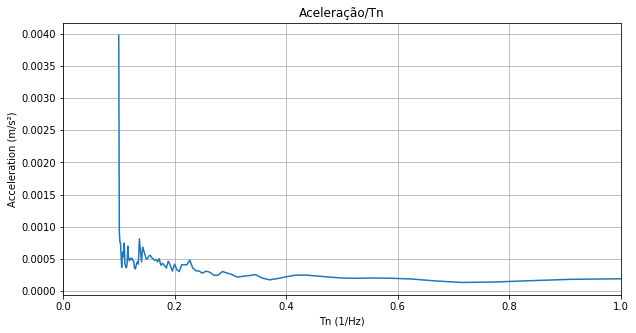

In [25]:
fn = 0
Lfn = []
Lumax=[]
Lwn = []
Ltn = []
for nume in range(100):
    fn += 0.1
    Lfn.append(fn)
    Ltn.append(1/fn)
    u_FD = az.sdof_fdiff  (fn, zt, u0, v0)/m
    u_DH = az.sdof_Duhamel(fn, zt, u0, v0)/m
    mini=u_FD.min()
    maxi=u_FD.max()
    mini = mini * -1
    if mini>maxi:
        Lumax.append(mini)
        Wn=mini*(1/fn*fn)
        Lwn.append(Wn)
    else:
        Lumax.append(maxi)
        Wn=mini*(1/fn*fn)
        Lwn.append(Wn)

maior=max(Lumax)
print ('Maior deslocamento:',maior)   
n_pos = Lumax.index(maior)
maiorfn=Lfn[n_pos]
_wn=2*np.pi*maiorfn
k=_wn*_wn*m
Feq=k*maior
print('Frequência natural correspondente ao pior cenário de deslocamento:',maiorfn)
print('Rígidez da estrutura =',k)
print('Força estática equivalente =',maior)

plt.figure(9, figsize=(10, 5), clear=True)
plt.plot(Lfn,Lumax)

plt.xlim(0, 10);        plt.xlabel('Fn (Hz)') 
plt.ylabel('Displacement (m)') 
plt.title('Deslocamento/Fn')
plt.grid(True) 

Ltn.reverse()

plt.figure(10, figsize=(10, 5), clear=True)
plt.plot(Ltn,Lwn)

plt.xlim(0, 1);        plt.xlabel('Tn (1/Hz)') 
plt.ylabel('Acceleration (m/s²)') 
plt.title('Aceleração/Tn')
plt.grid(True)

### 8. Periodograma

No processamento de sinal, periodograma é uma estimativa da densidade espectral de um sinal determinístico. O periodograma permite observar a frequência que possui a maior energia associada, ou seja, a frequência que domina o comportamento dinâmico da estrutura, causado pela excitação externa. 

Valor de pico: 28.744679450408164 Hz


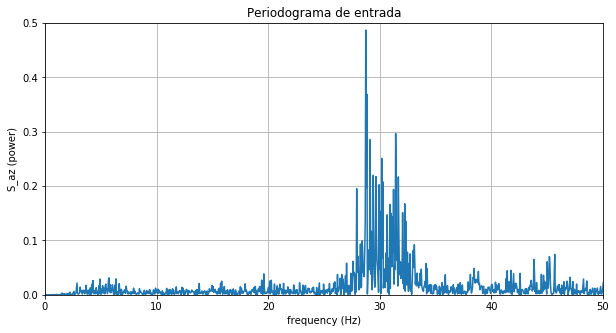

In [21]:
Saz, fs = az.periodogram()
f       = az.f_axis()
plt.figure(12, figsize=(10, 5), clear=True)
plt.title("Periodograma de entrada")
plt.plot(f, Saz[0])

plt.xlim(0, 50);   plt.xlabel('frequency (Hz)') 
plt.ylim(0,  0.5);   plt.ylabel('S_az (power)') 

plt.grid(True)

fpico = f[np.argmax(Saz[0])]
print("Valor de pico:", fpico, "Hz")

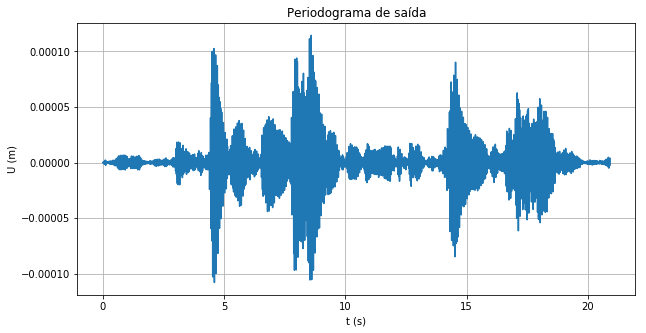

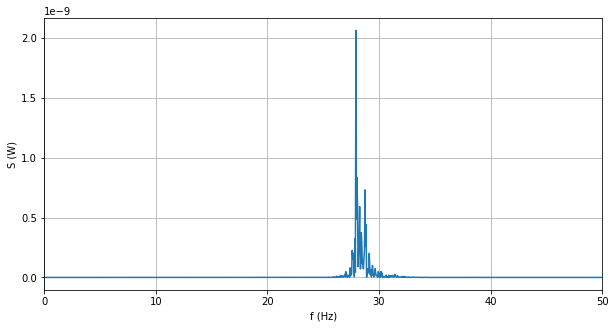

In [26]:
# Cálculo periodograma de saída

fnout = 28
uout = az.sdof_Duhamel(fnout, zt, u0, v0)/m

plt.figure(figsize=(10, 5))
plt.title("Periodograma de saída")
plt.plot(t, uout[0])
plt.xlabel('t (s)') 
plt.ylabel('U (m)')

plt.grid(True)

Sout, fsout = uout.periodogram()
fout = uout.f_axis()

plt.figure(figsize=(10, 5))
plt.plot(fout, Sout[0])
plt.xlim(0, 15); plt.xlabel('f (Hz)') 
plt.xlim(0, 50); plt.ylabel('S (W)') 

plt.grid(True)

### 9.Conclusão

O trabalho implica diversas aplicações para a linguagem _Python_, determinando os gráficos e equacionamentos de maneira simples e direta. As leituras dos dados lidos nos aplicativos também foram feitas com a possibilidade de controlar a sua qualidade, uma vez que a frequência de aquisição de dados é mais que duas vezes superior à frequência obtida pelos gráficos do periodograma. A partir das leituras de movimentação vertical medidas pelo ensaio de campo, verificou-se que que no gráfico do periodograma a maior energia encontra-se na frequência natural de 28,74 $Hz$. Além disso, foi possível determinar o maior valor de deslocamento para todas as frequências, e, de posse da rigidez, determinar o valor da força estática equivalente da estrutura. 